# Matplotlib for Publication - Exercise 1

Here you will play with a cleaned and curated version of a recent release of the NASA exoplanet database, featuring >5000 exoplanets, that was published on the Kaggle. Some of the units have been changed from the original document so that you can focus on plotting (e.g. most gas giant planets had their masses and radii reported in Jupiter units, but I've converted all planet masses and radii to Earth units). 

Here are the column names and descriptions:
- **name**: exoplanet name. The convention is the star's catalog name followed by a lowercase letter, starting with b and progressing alphabetically in order of discovery 
- **distance**: distance to the planetary system in light years
- **star_mag**: apparent brightness of the star as seen from Earth in the astronomical magnitude system (don't worry about this one too much, the units are pretty awful to work with). Higher numbers indicate fainter stars and the system is logarithmic; an *increase* of 5 magnitudes corresponds to a *decrease* in brightness by a factor of 100.
- **planet_type**: values include "Gas Giant" (like Jupiter or Saturn), "Neptune-like" (sort of a mini gas giant or ice giant), "Super Earth" (thought to be rocky but up to a few times larger than Earth), and "Terrestrial" (comparable to or smaller than Earth)
- **discovery_yr**: year that the discovery of the planet was published
- **mass_ME**: mass of the planet in units of Earth masses (1 Earth mass = $5.972 \times 10^{24}$ kg)
- **radius_RE**: radius of the planet in units of Earth masses (1 Earth radius = 6371 km)
- **orbital_radius_AU**: the exoplanet's orbital semi-major axis in units of the average distance between the Earth and Sun (1 Astronomical Unit, or AU)
- **orbital_period_yr**: the time taken for the exoplanet to orbit its star in units of Earth's year
- **eccentricity**: measure of the deviation of the exoplanet's orbit from a perfect circle. Values range from 0 to 1 where 0 = perfect circle and 1 indicates a parabolic (just barely unbound) orbit.
- **detection_method**: principle method used to detect the planet. See [this educational slideshow by NASA](https://exoplanets.nasa.gov/alien-worlds/ways-to-find-a-planet/) or [this Wikipedia page](https://en.wikipedia.org/wiki/Methods_of_detecting_exoplanets) for more details.

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

exos = np.genfromtxt('exoplanets_5250_EarthUnits.csv',delimiter=',',dtype=None,
                     names=True, encoding='ascii')

#take a quick peak at the data so we know how to call it
print(exos.dtype.names)
print(exos[np.where(exos['name']=='55 Cancri e')])
print(exos[705])

('name', 'distance', 'star_mag', 'planet_type', 'discovery_yr', 'mass_ME', 'radius_RE', 'orbital_radius_AU', 'orbital_period_yr', 'eccentricity', 'detection_method')
[('55 Cancri e', 41, 5.95084, 'Super Earth', 2004, 7.99, 1.875, 0.01544, 0.0019165, 0.05, 'Radial Velocity')]
('HD 160691 e', 51, 5.12, 'Gas Giant', 2006, 2226., nan, 0.934, 0.84298426, 0.07, 'Radial Velocity')


1. First, see what you get if you plot the exoplanet mass against the orbital radius. (Tip: you may want to use a log-log scale)

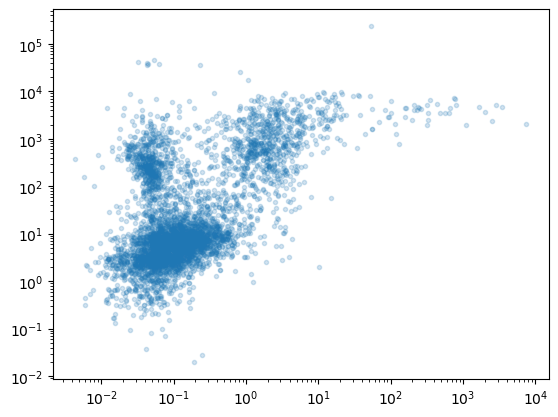

In [34]:
plt.loglog(exos['orbital_radius_AU'][~np.isnan(exos['mass_ME'])],
           exos['mass_ME'][~np.isnan(exos['mass_ME'])], '.', alpha=0.2)

2. If you just did a log-log plot, you can probably make out 3 concentrations, but the points probably look a bit dense. Try setting the alpha kwarg of plt.loglog() to a value between 0 and 1, and then try redoing the plot as a hexbin plot (hint: set bins='log'). Which looks better if you want to highlight that there are 3 main populations but don't want to lose sight of the outliers?

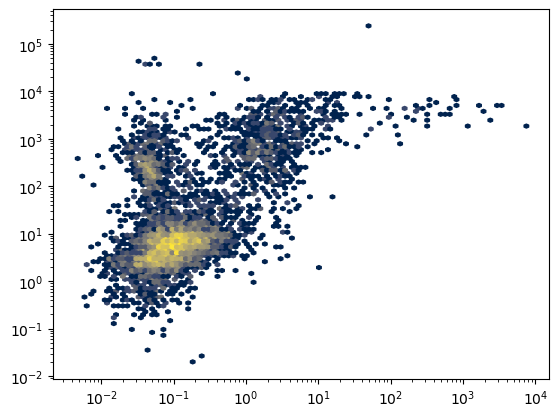

In [41]:
import matplotlib as mpl
plt.hexbin(exos['orbital_radius_AU'][~np.isnan(exos['mass_ME'])],
           exos['mass_ME'][~np.isnan(exos['mass_ME'])], xscale='log', yscale='log', bins='log',
          cmap = mpl.colormaps['cividis'])

3. Use the given dictionary variable to plot the major Solar System planets (and Pluto for perspective) on the same figure using distinct markers. Now re-evaluate whether the hexbin or scatter plot is better.

Hard mode: try downloading an icon of Earth and setting that as Earth's marker on the plot. Make sure it's recognizable, but doesn't cover too much of the exoplanet data.

In [43]:
solsys = {'name': np.array(['Mercury','Venus','Earth','Mars',
                            'Jupiter','Saturn','Uranus','Neptune','Pluto']),
         'planet_type': np.array(['Terrestrial','Terrestrial','Terrestrial','Terrestrial',
                                  'Gas Giant','Gas Giant','Neptune-like','Neptune-like', 'Ice Dwarf']), 
         'mass_ME': np.array([0.0553,0.815,1.0,0.107, 317.8,95.2,14.5,17.1, 0.0022]), 
         'radius_RE': np.array([0.383,0.949,1.0,0.532, 11.21,9.45,4.01,3.88, 0.187]),
         'orbital_radius_AU': np.array([0.387,0.723,1.0,1.52, 5.20,9.57,19.17,30.18, 39.48]),
         'orbital_period_yr': np.array([0.241,0.615,1.0,1.88, 11.9,29.4,83.7,163.7, 247.9]),
         'eccentricity': np.array([0.206,0.007,0.017,0.094, 0.049,0.052,0.047,0.010, 0.244])}

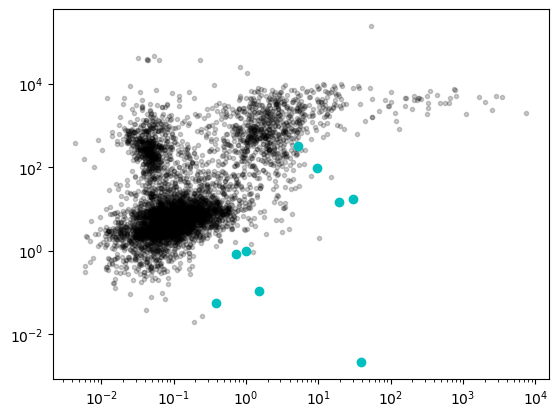

In [52]:
plt.loglog(exos['orbital_radius_AU'][~np.isnan(exos['mass_ME'])],
           exos['mass_ME'][~np.isnan(exos['mass_ME'])], '.', alpha=0.2, color='k')
plt.loglog(solsys['orbital_radius_AU'],solsys['mass_ME'],'co')

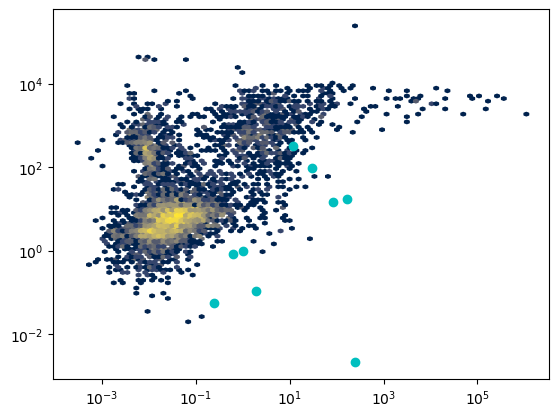

In [54]:
plt.hexbin(exos['orbital_period_yr'][~np.isnan(exos['mass_ME'])],
           exos['mass_ME'][~np.isnan(exos['mass_ME'])], xscale='log', yscale='log', bins='log',
          cmap = mpl.colormaps['cividis'])
plt.loglog(solsys['orbital_period_yr'],solsys['mass_ME'],'co')